In [2]:
import numpy as np
import matplotlib.pyplot as plt

#data of 10 people -> [age, savings]

people = np.array([[0.3, 0.4], [0.4, 0.3],
                   [0.3, 0.2], [0.4, 0.1],
                   [0.5, 0.2], [0.4, 0.8],
                   [0.6, 0.8], [0.5, 0.6],
                   [0.7, 0.6], [0.8, 0.5]])

#1 approved 0: denied

classes = np.array([0,0,0,0,0,1,1,1,1,1])

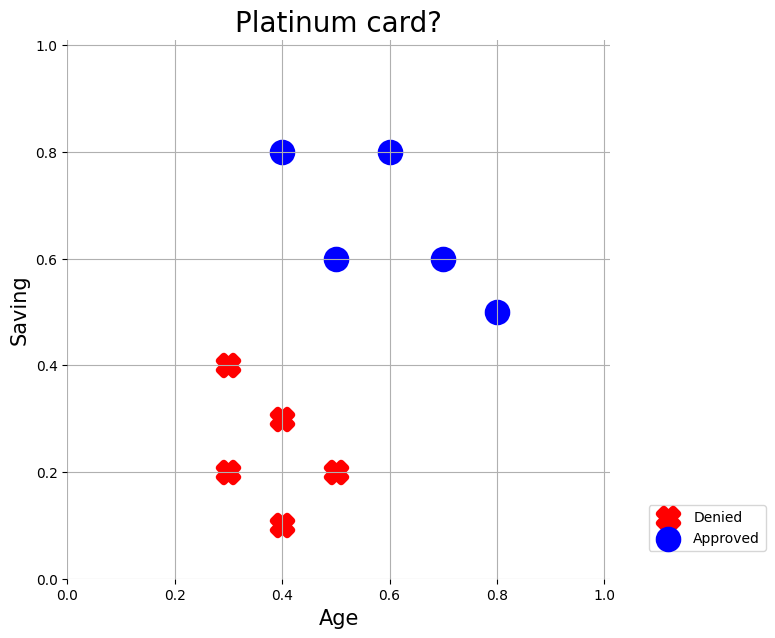

In [3]:
#dispersion graphic (age, savings)

plt.figure(figsize=(7,7))
plt.title("Platinum card?", fontsize=20)

plt.scatter(people[classes==0].T[0],
            people[classes==0].T[1],
            marker="X", s=180, color="red",
            linewidth=5, label="Denied")

plt.scatter(people[classes==1].T[0],
            people[classes==1].T[1],
            marker="o", s=180, color="blue",
            linewidth=5, label="Approved")

plt.xlabel("Age", fontsize=15)
plt.ylabel("Saving", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()

In [7]:
#w1*x1 + w2*x2 + . . . + wn * xn
#test of activation fuction only for dydactic goals in  this cell, after a while, training of percetron will be created

def activation(weights, x, b):
  z = weights * x
  if z.sum() + b >0:
    return 1
  else:
    return 0


weights = np.random.uniform(-1,1, size=2)
b = np.random.uniform(-1,1)

weights, b, activation(weights,[0.5,0.5],b)

(array([ 0.65705105, -0.22819117]), -0.0806782984105574, 1)

In [33]:
#training of perceptron

weights = np.random.uniform(-1,1, size=2)
b = np.random.uniform(-1,1)
learning_rate = 0.01
epochs = 100

for epoca in range(epochs):
  error_total = 0

  for i in range(len(people)):
    prediction = activation(weights, people[i], b)
    error= classes[i] - prediction
    error_total += error**2
    weights[0] += learning_rate*people[i][0] * error
    weights[1] += learning_rate*people[i][1] * error
    b +=  learning_rate * error

  print(error_total, end=" ")

print("\nis credit available for a kid?: ", activation(weights, [0.1,0], b))
print("\nis credit available for a 50 year old man?: ", activation(weights, [0.50,0.80], b))


5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 3 3 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
is credit available for a kid?:  0

is credit available for a 50 year old man?:  1


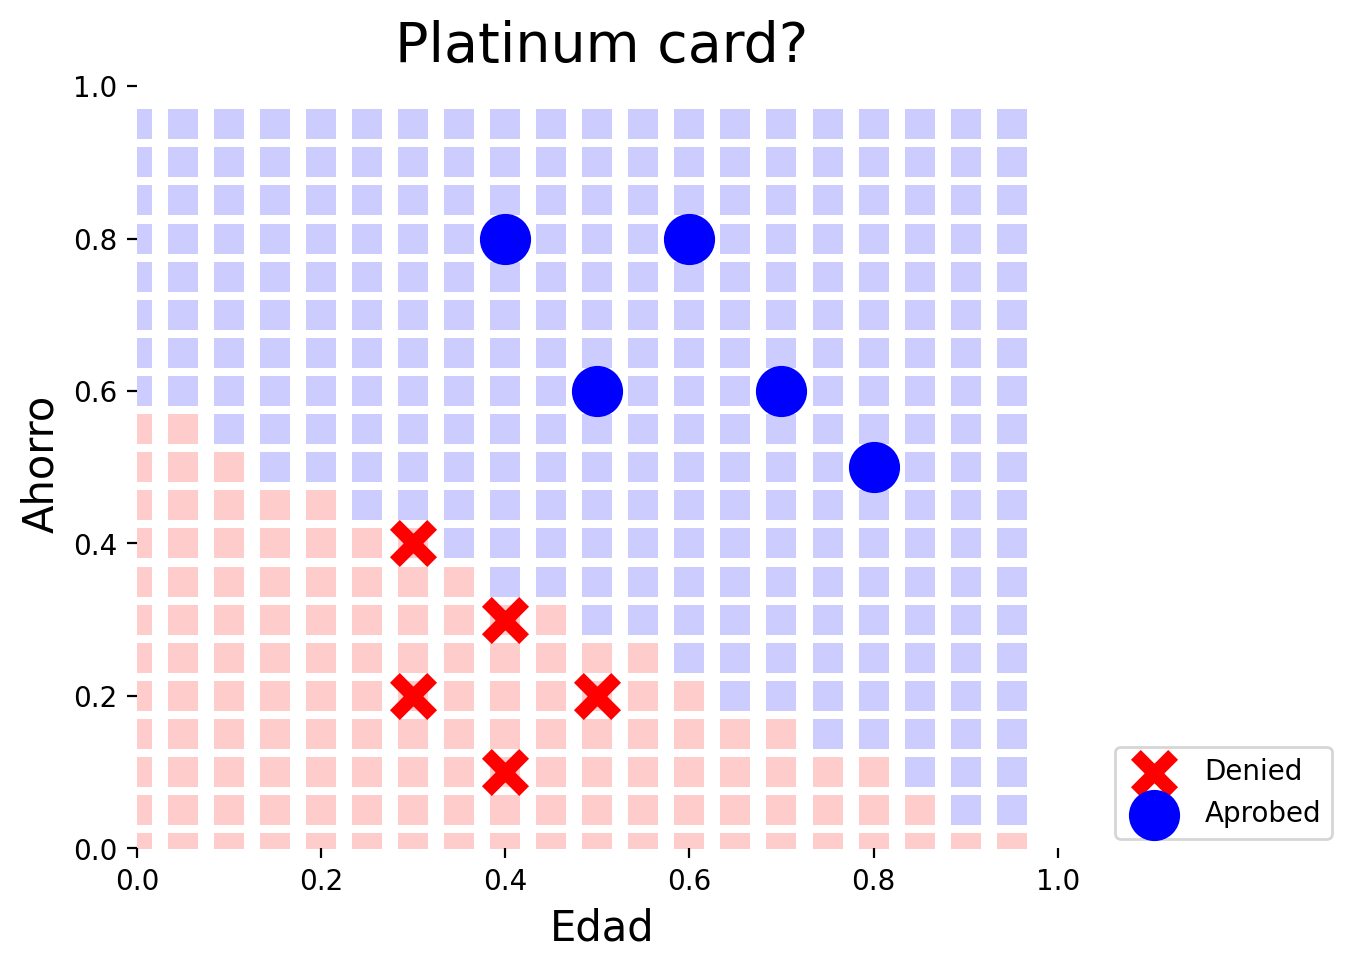

In [34]:
plt.figure(figsize=(6,5), dpi = 200)
plt.title("Platinum card?", fontsize=20)

plt.scatter(people[classes==0].T[0],
            people[classes==0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Denied")

plt.scatter(people[classes==1].T[0],
            people[classes==1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobed")

for age in np.arange(0,1,0.05):
  for saving in np.arange(0,1,0.05):
    color = activation(weights, [age, saving], b)
    if(color==1):
      plt.scatter(age, saving, marker="s", s=110,
                  color="blue", alpha=0.2, linewidths=0)
    else:
      plt.scatter(age, saving, marker="s", s=110,
                  color="red", alpha=0.2, linewidths=0)

plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0,1.01))
plt.ylim((0,1.01))
plt.show()

In [37]:
#traing perceptron with scikit-learn
from sklearn.linear_model import Perceptron

perceptron = Perceptron().fit(people, classes)
prediction = perceptron.predict([[0.2, 0.20],[0.8, 0.80]])

print("20years old young with 20k:", prediction[0], "\n80years oldman with 80k", prediction[1])

20years old young with 20k: 0 
80years oldman with 80k 1
